# Part 1: Python & Data Fundamentals
**Time Allocation:** 20-25 minutes  
**Points:** 25 points total  

**Instructions:** Complete all tasks in order. Add your code in the empty cells provided.

---

## Dataset Information
**File:** `customer_data.csv` (provided in `/data/` folder)  
**Description:** Customer information for a telecom company including demographics and service usage.

**Columns:**
- `customer_id`: Unique customer identifier
- `age`: Customer age
- `gender`: Male/Female
- `monthly_charges`: Monthly bill amount
- `total_charges`: Total charges to date
- `contract_type`: Month-to-month, One year, Two year
- `internet_service`: DSL, Fiber optic, No
- `churn`: Yes/No (whether customer left)

---
## Task 1.1: Data Loading & Basic Exploration (8 points)

### Instructions:
1. **Load the dataset** using pandas
   - Import necessary libraries (pandas, numpy)
   - Read `customer_data.csv` from the data folder
   - Display the first 5 rows

2. **Explore dataset structure**
   - Show the shape of the dataset (number of rows and columns)
   - Display column names and data types
   - Check for any obvious issues in the data

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [30]:
# Load the dataset
df = pd.read_csv('../data/customer_data.csv')

In [31]:
df

,customer_id,age,gender,monthly_charges,total_charges,contract_type,internet_service,churn
0,CUST_0001,40.0,Male,73.89,NaN,Month-to-month,Fiber optic,Yes
1,CUST_0002,33.0,Male,44.24,471.25,Month-to-month,DSL,No
2,CUST_0003,42.0,Female,104.59,269.19,Month-to-month,Fiber optic,Yes
3,CUST_0004,53.0,Female,18.07,147.33,Month-to-month,No,No
4,CUST_0005,32.0,Male,82.58,1882.38,Two year,Fiber optic,No
...,...,...,...,...,...,...,...,...
995,CUST_0996,31.0,Male,30.67,821.73,Two year,DSL,No
996,CUST_0997,56.0,Male,77.19,121.29,Month-to-month,Fiber optic,Yes
997,CUST_0998,42.0,Male,27.93,61.13,Month-to-month,No,No
998,CUST_0999,28.0,Male,82.72,3021.44,Two year,Fiber optic,Yes


In [32]:
# Display first 5 rows
df.head()

,customer_id,age,gender,monthly_charges,total_charges,contract_type,internet_service,churn
0,CUST_0001,40.0,Male,73.89,NaN,Month-to-month,Fiber optic,Yes
1,CUST_0002,33.0,Male,44.24,471.25,Month-to-month,DSL,No
2,CUST_0003,42.0,Female,104.59,269.19,Month-to-month,Fiber optic,Yes
3,CUST_0004,53.0,Female,18.07,147.33,Month-to-month,No,No
4,CUST_0005,32.0,Male,82.58,1882.38,Two year,Fiber optic,No


In [33]:
# Ensure df_clean is defined
df_clean = df.copy()

# Show cleaned dataset shape
df_clean.shape

(1000, 8)

In [34]:
# Display column names and data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   object 
 1   age               992 non-null    float64
 2   gender            993 non-null    object 
 3   monthly_charges   1000 non-null   float64
 4   total_charges     980 non-null    float64
 5   contract_type     1000 non-null   object 
 6   internet_service  1000 non-null   object 
 7   churn             1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


---
## Task 1.2: Data Quality Assessment (7 points)

### Instructions:
1. **Check for missing values**
   - Count missing values in each column
   - Calculate percentage of missing data per column

2. **Basic statistics**
   - Generate descriptive statistics for numerical columns
   - Count unique values in categorical columns

3. **Identify potential issues**
   - Look for unrealistic values (negative ages, etc.)
   - Check for duplicate customer IDs

In [35]:
# Ensure df_clean is defined
df_clean = df.copy()

# Check for missing values - count
df_clean.isnull().sum()

customer_id          0
age                  8
gender               7
monthly_charges      0
total_charges       20
contract_type        0
internet_service     0
churn                0
dtype: int64

In [36]:
# Check for missing values - percentage
df.isnull().mean() * 100

customer_id         0.0
age                 0.8
gender              0.7
monthly_charges     0.0
total_charges       2.0
contract_type       0.0
internet_service    0.0
churn               0.0
dtype: float64

In [37]:
# Descriptive statistics for numerical columns
df.describe()

,age,monthly_charges,total_charges
count,992.000000,1000.000000,980.000000
mean,35.113911,54.016230,789.081010
std,11.072740,23.161593,722.857777
min,18.000000,15.000000,16.270000
25%,27.000000,35.292500,226.025000
50%,35.000000,50.845000,569.295000
75%,42.000000,73.310000,1107.257500
max,75.000000,123.650000,4440.900000


In [38]:
# Count unique values in categorical columns
df.select_dtypes(include='object').nunique()

customer_id         1000
gender                 2
contract_type          3
internet_service       3
churn                  2
dtype: int64

In [39]:
# Check for duplicate customer IDs
df['customer_id'].duplicated().sum()

np.int64(0)

In [40]:
# Check for unrealistic values (negative ages, extreme charges, etc.)
df[(df['age'] < 0) | (df['monthly_charges'] < 0) | (df['total_charges'] < 0)]

,customer_id,age,gender,monthly_charges,total_charges,contract_type,internet_service,churn


---
## Task 1.3: Simple Data Visualization (5 points)

### Instructions:
Create **2 visualizations** to understand the data better:

1. **Age Distribution**
   - Create a histogram of customer ages
   - Add appropriate title and labels

2. **Churn by Contract Type**
   - Create a bar chart showing churn rates for each contract type
   - Use different colors for churned vs non-churned customers

In [41]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

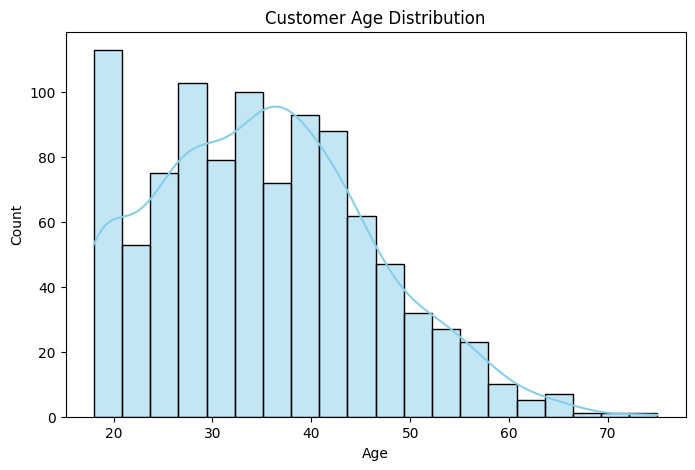

In [42]:
# Create histogram of customer ages
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

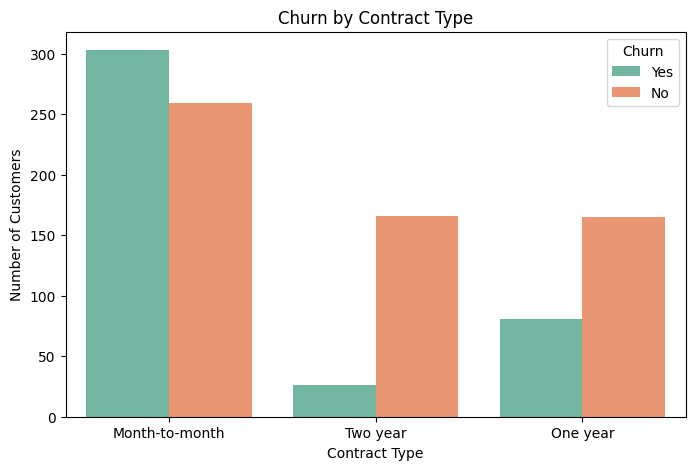

In [43]:
# Create bar chart for churn by contract type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='contract_type', hue='churn', palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

---
## Task 1.4: Basic Data Preparation (5 points)

### Instructions:
1. **Handle missing values**
   - For numerical columns: Fill with median value
   - For categorical columns: Fill with mode (most frequent value)

2. **Convert data types**
   - Convert `total_charges` to numeric (it might be stored as text)
   - Ensure `age` and `monthly_charges` are numeric

3. **Create a clean dataset**
   - Save the cleaned dataset as `cleaned_customer_data.csv`
   - Display confirmation that cleaning was successful

In [44]:
# Create a copy of the dataset for cleaning
df_clean = df.copy()

In [45]:
# Handle missing values in numerical columns (use median)
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

In [46]:
# Handle missing values in categorical columns (use mode)
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [47]:
# Convert data types - total_charges to numeric, ensure age and monthly_charges are numeric
df_clean['total_charges'] = pd.to_numeric(df_clean['total_charges'], errors='coerce')
df_clean['age'] = pd.to_numeric(df_clean['age'], errors='coerce')
df_clean['monthly_charges'] = pd.to_numeric(df_clean['monthly_charges'], errors='coerce')

In [48]:
# Verify all data types are correct
df_clean.dtypes

customer_id          object
age                 float64
gender               object
monthly_charges     float64
total_charges       float64
contract_type        object
internet_service     object
churn                object
dtype: object

In [49]:
# Save cleaned dataset
df_clean.to_csv('../data/cleaned_customer_data.csv', index=False)

In [50]:
# Verify cleaning was successful (no missing values, correct data types)
print('Missing values per column:')
print(df_clean.isnull().sum())
print('\nData types:')
print(df_clean.dtypes)

Missing values per column:
customer_id         0
age                 0
gender              0
monthly_charges     0
total_charges       0
contract_type       0
internet_service    0
churn               0
dtype: int64

Data types:
customer_id          object
age                 float64
gender               object
monthly_charges     float64
total_charges       float64
contract_type        object
internet_service     object
churn                object
dtype: object


---
## Submission Checklist for Part 1

Before moving to Part 2, verify you have completed:

- [ ] ✅ Loaded the dataset successfully
- [ ] ✅ Displayed basic information about the data
- [ ] ✅ Identified and analyzed missing values
- [ ] ✅ Created two visualizations (age histogram + churn by contract)
- [ ] ✅ Cleaned the data and handled missing values
- [ ] ✅ Saved `cleaned_customer_data.csv`
- [ ] ✅ All code cells run without errors

**Time Check:** You should have spent approximately 20-25 minutes on Part 1